In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import urllib.request
import os
from urllib.request import urlopen

driver = webdriver.Chrome('C:/Users/YOONSU/chromedriver.exe')

driver.get('https://www.google.co.kr/imghp?hl=ko&tab=ri&authuser=0&ogbl')

elem = driver.find_element_by_name("q")
elem.send_keys("cat")
elem.send_keys(Keys.RETURN)

driver.find_element_by_css_selector(".rg_i.Q4LuWd").click()
time.sleep(2)
imgUrl = driver.find_element_by_xpath("/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div/div[2]/a/img").get_attribute("src")
urllib.request.urlretrieve(imgUrl,"cat.jpg")

('.jpg', <email.message.Message at 0x1c65573c550>)

In [22]:
img_basic = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
cv2.imshow('Image_Basic',img_basic)
cv2.waitKey(0)
cv2.imwrite('result1.png',img_basic)

cv2.destroyAllWindows()

img_gray = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
cv2.imshow('Image_Gray',img_gray)
cv2.waitKey(0)
cv2.imwrite('result2.png',img_gray)

True

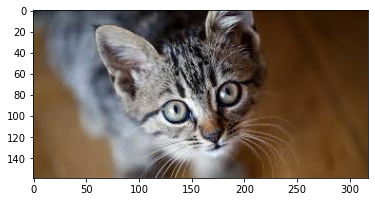

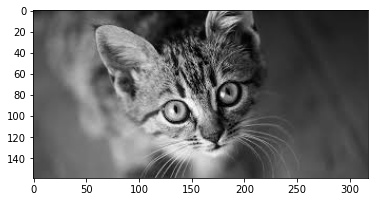

In [4]:
img_basic = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_GRAY2RGB))
plt.show()

OpenCV 이미지 연산

In [5]:
image = cv2.imread('cat.jpg')

#픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

#이미지 Numpy 객체의 특정 픽설을 가리킵니다.
px = image[100,100]

#B,G,R 순서로 출력됩니다.
print(px)

#R 값만 출력하기
print(px[2])

(159, 318, 3)
151686
[176 171 170]
170


특정 범위 픽셀 변경

---0.0 seconds---


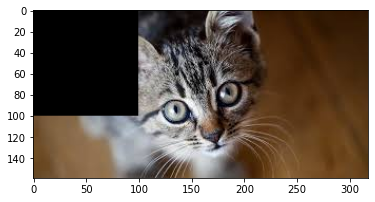

In [10]:
image = cv2.imread('cat.jpg')

# start_time = time.time()
# for i in range(0,100):
#     for j in range(0,100):
#         image[i,j] = [255,255,255]
# print("---%s seconds---" %(time.time() - start_time))
start_time = time.time()
image[0:100,0:100] = [0,0,0]
print("---%s seconds---" %(time.time() - start_time))

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

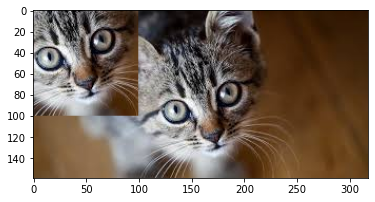

In [17]:
image = cv2.imread('cat.jpg')

#Numpy Slicing:ROI 처리 기능
roi = image[50:150, 120:220]

#ROI 단위로 이미지 복사하기
image[0:100, 0:100] = roi
# image[0:100, 0:100] = image[50:150, 120:220]
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show

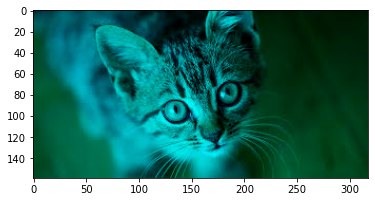

In [18]:
image = cv2.imread('cat.jpg')
image[:,:,2] = 0

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

OpenCV 이미지 변형

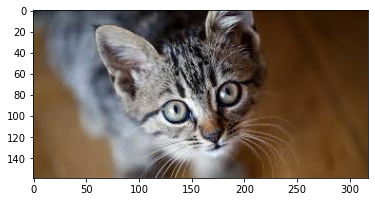

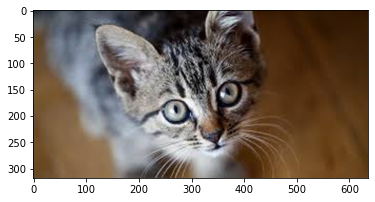

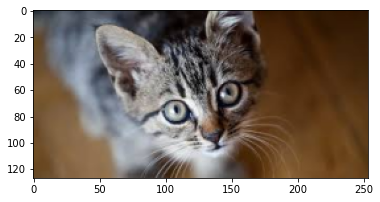

In [19]:
image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand,cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink,cv2.COLOR_BGR2RGB))
plt.show()

이미지 위치 변경

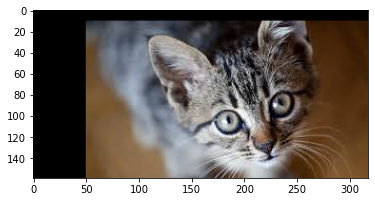

In [25]:
image = cv2.imread('cat.jpg')

height, width = image.shape[:2]

M = np.float32([[1,0,50],[0,1,10]])
dst = cv2.warpAffine(image,M,(width,height))

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

이미지 회전

[[ 3.061617e-17  5.000000e-01  1.192500e+02]
 [-5.000000e-01  3.061617e-17  1.590000e+02]]


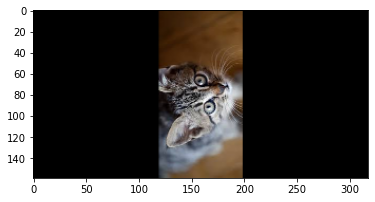

In [27]:
image = cv2.imread('cat.jpg')

height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(M)
dst = cv2.warpAffine(image,M,(width,height))

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

Saturation 연산을 이용한 이미지 합치기

img1.shape = (480, 480, 3), img1.dtype = uint8
img2.shape = (866, 1300, 3), img2.dtype = uint8
resized_img2.shape = (480, 480, 3), resized_img2.dtype=uint8


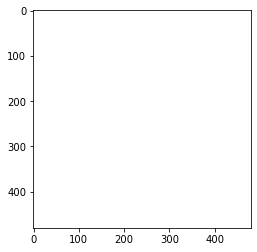

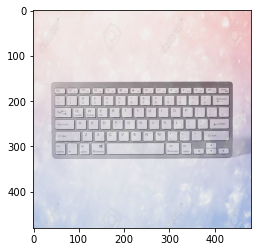

In [15]:
image_1 = cv2.imread('Keyboard.jpg')
print("img1.shape = {0}, img1.dtype = {1}".format(image_1.shape, image_1.dtype))
image_2 = cv2.imread('Pastel_image.jpg')
print("img2.shape = {0}, img2.dtype = {1}".format(image_2.shape, image_2.dtype))
# print(image_1.size)
# print(image_2.size)

# resize를 이용해 사이즈 조정
# print(image_1.shape)
# print(resized_img2.shape)
resized_img2 = cv2.resize(image_2, (480, 480),interpolation=cv2.INTER_AREA)
print("resized_img2.shape = {0}, resized_img2.dtype={1}".format(resized_img2.shape, resized_img2.dtype))
# plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(resized_img2, cv2.COLOR_BGR2RGB))
# plt.show()

result = cv2.add(image_1,resized_img2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

result = image_1 + resized_img2
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()